# Homework 4
In this assignment, we will building a Naïve Bayes classifier and a SVM model for the productivity satisfaction of [the given dataset](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees), the productivity of garment employees.

## For Questions 1-3:
### Background 
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. 

### Dataset Attribute Information

1. **date**: Date in MM-DD-YYYY
2. **day**: Day of the Week
3. **quarter** : A portion of the month. A month was divided into four quarters
4. **department** : Associated department with the instance
5. **team_no** : Associated team number with the instance
6. **no_of_workers** : Number of workers in each team
7. **no_of_style_change** : Number of changes in the style of a particular product
8. **targeted_productivity** : Targeted productivity set by the Authority for each team for each day.
9. **smv** : Standard Minute Value, it is the allocated time for a task
10. **wip** : Work in progress. Includes the number of unfinished items for products
11. **over_time** : Represents the amount of overtime by each team in minutes
12. **incentive** : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. **idle_time** : The amount of time when the production was interrupted due to several reasons
14. **idle_men** : The number of workers who were idle due to production interruption
15. **actual_productivity** : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

#### Libraries that can be used: numpy, scipy, pandas, scikit-learn, cvxpy, imbalanced-learn
Any libraries used in the discussion materials are also allowed.

#### Other Notes

 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.

#### Trouble Shooting
In case you have trouble installing and using imbalanced-learn(imblearn) <br >
Run the below code cell, then go to the selection bar at top: Kernel > Restart. <br >
Then try `import imblearn` to see if things work. 


we are also working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply K-means Clustering, and PCA to this dataset for Q4-5. <br >

### Background and Data Information Q4-5
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

## Exercise 1 - General Data Preprocessing (10 points)

Our dataset needs cleaning before building any models. Some of the cleaning tasks are common in general, but depends on what kind of models we are building, sometimes we have to do additional processing. These additional tasks will be mentioned in each of the remaining two exercises later.

Note that **we will be using this processed data from exercise 1 in each of the remaining two exercises**.

For convenience, here are the attributes that we would treat them as **categorical attributes**: `day`, `quarter`, `department`, and `team`. 

 - Drop the column `date`.
 - For each of the categorical attributes, **print out** all the unique elements.
 - For each of the categorical attributes, remap the duplicated items, if you find there are typos or spaces among the duplicated items.
     - For example, "a" and "a " should be the same, so we need to update "a " to be "a".
     - Another example, "apple" and "appel" should be the same, so you should update "appel" to be "apple".
     

 - Create another column named `satisfied` that records the productivity performance. The behavior defined as follows. **This is the dependent variable we'd like to classify in this assignment.**
     - Return True or 1 if `actual_productivity` is equal to or greater than `targeted_productivity`. Otherwise, return False or 0, which means the team fails to meet the expected performance.
 - Drop the columns `actual_productivity` and `targeted_productivity`.


 - Find and **print out** which columns/attributes that have empty vaules, e.g., NA, NaN, null, None.
 - Fill the empty values with 0.

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df_garment = pd.read_csv('garments_worker_productivity.csv')

# Drop 'date' column
df_garment = df_garment.drop(columns=['date'])

# Print unique elements of categorical attributes
categorical_attributes = ['day', 'quarter', 'department', 'team']
for cat in categorical_attributes:
    print(f"{cat}: {df_garment[cat].unique()}")

# Remap duplicated items in categorical attributes
# Example: df_garment['department'] = df_garment['department'].str.strip().replace({"appel": "apple"})
# Add similar code for other attributes if needed

# Create 'satisfied' column
df_garment['satisfied'] = df_garment['actual_productivity'] >= df_garment['targeted_productivity']

# Drop 'actual_productivity' and 'targeted_productivity'
df_garment = df_garment.drop(columns=['actual_productivity', 'targeted_productivity'])

# Find and fill empty values
print(df_garment.columns[df_garment.isna().any()])
df_garment = df_garment.fillna(0)

print(df_garment.head(5))

day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
department: ['sweing' 'finishing ' 'finishing']
team: [ 8  1 11 12  6  7  2  3  9 10  5  4]
Index(['wip'], dtype='object')
    quarter  department       day  team    smv     wip  over_time  incentive  \
0  Quarter1      sweing  Thursday     8  26.16  1108.0       7080         98   
1  Quarter1  finishing   Thursday     1   3.94     0.0        960          0   
2  Quarter1      sweing  Thursday    11  11.41   968.0       3660         50   
3  Quarter1      sweing  Thursday    12  11.41   968.0       3660         50   
4  Quarter1      sweing  Thursday     6  25.90  1170.0       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  satisfied  
0        0.0         0                   0           59.0       True  
1        0.0         0                   0            8.0       True  
2        0.0         0                   0      

## Exercise 2 - Naïve Bayes Classifier (25 points in total)

### Exercise 2.1 - Additional Data Preprocessing (5 points)

To build a Naïve Bayes Classifier, we need to further encode our categorical variables.

 - For each of the **categorical attribtues**, encode the set of categories to be **0 ~ (n_classes - 1)**.
     - For example, \["paris", "paris", "tokyo", "amsterdam"\] should be encoded as \[1, 1, 2, 0\].
     - Note that the order does not really matter, i.e., \[0, 0, 1, 2\] also works. But you have to start with 0 in your encodings.
     - You can find information about this encoding in the discussion materials.


 - Split the data into training and testing set with the ratio of 80:20.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

df_nb = df_garment.copy()

# Encode categorical attributes
encoder = OrdinalEncoder()
df_nb[categorical_attributes] = encoder.fit_transform(df_nb[categorical_attributes])

# Split data into training and testing set
nb_train, nb_test = train_test_split(df_nb, test_size=0.2)
X_nb_train, y_nb_train = nb_train.drop(columns=['satisfied']), nb_train['satisfied']
X_nb_test, y_nb_test = nb_test.drop(columns=['satisfied']), nb_test['satisfied']

print(df_nb)

      quarter  department  day  team    smv     wip  over_time  incentive  \
0         0.0         2.0  3.0   7.0  26.16  1108.0       7080         98   
1         0.0         1.0  3.0   0.0   3.94     0.0        960          0   
2         0.0         2.0  3.0  10.0  11.41   968.0       3660         50   
3         0.0         2.0  3.0  11.0  11.41   968.0       3660         50   
4         0.0         2.0  3.0   5.0  25.90  1170.0       1920         50   
...       ...         ...  ...   ...    ...     ...        ...        ...   
1192      1.0         0.0  5.0   9.0   2.90     0.0        960          0   
1193      1.0         0.0  5.0   7.0   3.90     0.0        960          0   
1194      1.0         0.0  5.0   6.0   3.90     0.0        960          0   
1195      1.0         0.0  5.0   8.0   2.90     0.0       1800          0   
1196      1.0         0.0  5.0   5.0   2.90     0.0        720          0   

      idle_time  idle_men  no_of_style_change  no_of_workers  satisfied  
0

### Exercise 2.2 - Naïve Bayes Classifier for Categorical Attributes (10 points)

Use the categorical attributes **only**, please build a Categorical Naïve Bayes classifier that predicts the column `satisfied`. <br >
Report the **testing result** using `classification_report`.

In [3]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# For Categorical Attributes
clf_cat = CategoricalNB()
clf_cat.fit(X_nb_train[categorical_attributes], y_nb_train)
print("Categorical Naive Bayes Classifier Report:")
print(classification_report(y_nb_test, clf_cat.predict(X_nb_test[categorical_attributes])))

Categorical Naive Bayes Classifier Report:
              precision    recall  f1-score   support

       False       0.58      0.21      0.31        67
        True       0.75      0.94      0.84       173

    accuracy                           0.74       240
   macro avg       0.67      0.58      0.57       240
weighted avg       0.71      0.74      0.69       240



C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### Exercise 2.3 - Naïve Bayes Classifier for Numerical Attributes (10 points)

Use the numerical attributes **only**, please build a Gaussian Naïve Bayes classifier that predicts the column `satisfied`. <br >
Report the **testing result** using `classification_report`.

**Remember to scale your data. The scaling method is up to you.**

In [4]:
# For Numerical Attributes
numerical_attributes = list(set(df_garment.columns) - set(categorical_attributes) - {'satisfied'})
scaler = StandardScaler()
X_nb_train_scaled = scaler.fit_transform(X_nb_train[numerical_attributes])
X_nb_test_scaled = scaler.transform(X_nb_test[numerical_attributes])

clf_num = GaussianNB()
clf_num.fit(X_nb_train_scaled, y_nb_train)
print("Gaussian Naive Bayes Classifier Report:")
print(classification_report(y_nb_test, clf_num.predict(X_nb_test_scaled)))

Gaussian Naive Bayes Classifier Report:
              precision    recall  f1-score   support

       False       1.00      0.03      0.06        67
        True       0.73      1.00      0.84       173

    accuracy                           0.73       240
   macro avg       0.86      0.51      0.45       240
weighted avg       0.80      0.73      0.62       240



C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future v

## Exercies 3 - SVM Classifier (30 points in total)

### Exercise 3.1 - Additional Data Preprocessing (5 points)

To build a SVM Classifier, we need a different encoding for our categorical variables.

 - For each of the **categorical attribtues**, encode them with **one-hot encoding**.
     - You can find information about this encoding in the discussion materials.


 - Split the data into training and testing set with the ratio of 80:20.

In [5]:
from sklearn.preprocessing import OneHotEncoder

df_svm = df_garment.copy()

# One-hot encode categorical attributes
df_svm = pd.get_dummies(df_svm, columns=categorical_attributes)

# Split data into training and testing set
svm_train, svm_test = train_test_split(df_svm, test_size=0.2)
X_svm_train, y_svm_train = svm_train.drop(columns=['satisfied']), svm_train['satisfied']
X_svm_test, y_svm_test = svm_test.drop(columns=['satisfied']), svm_test['satisfied']

In [6]:
print(df_svm)

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     0.0        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     0.0        960          0        0.0         0   
1193   3.90     0.0        960          0        0.0         0   
1194   3.90     0.0        960          0        0.0         0   
1195   2.90     0.0       1800          0        0.0         0   
1196   2.90     0.0        720          0        0.0         0   

      no_of_style_change  no_of_workers  satisfied  day_Monday  ...  team_3  \
0                      0           59.0       True       False  ...   False   
1                      0            8.0       Tru

### Exercise 3.2 - SVM with Different Kernels (15 points)

Using all the attributes we have, please build a SVM that predicts the column `satisfied`. <br >
Specifically, please 
 - Build one SVM with **linear kernel**.
 - Build another SVM but with **rbf kernel**.
 - Report the **testing results** of **both models** using `classification report`.

The kernel is the only setting requirement. <br >
Other hyperparameter tuning is not required. But make sure they are the same in these two SVMs if you'd like to tune the model. In other words, the only difference between the two SVMs should be the kernel setting.

**Remember to scale your data. The scaling method is up to you.**

In [7]:
from sklearn.svm import SVC

# Scale data
scaler = StandardScaler()
X_svm_train_scaled = scaler.fit_transform(X_svm_train)
X_svm_test_scaled = scaler.transform(X_svm_test)

# SVM with Linear Kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_svm_train_scaled, y_svm_train)
print("SVM with Linear Kernel Report:")
print(classification_report(y_svm_test, svc_linear.predict(X_svm_test_scaled)))

# SVM with RBF Kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_svm_train_scaled, y_svm_train)
print("SVM with RBF Kernel Report:")
print(classification_report(y_svm_test, svc_rbf.predict(X_svm_test_scaled)))

SVM with Linear Kernel Report:
              precision    recall  f1-score   support

       False       0.83      0.07      0.13        69
        True       0.73      0.99      0.84       171

    accuracy                           0.73       240
   macro avg       0.78      0.53      0.49       240
weighted avg       0.76      0.73      0.64       240

SVM with RBF Kernel Report:
              precision    recall  f1-score   support

       False       0.76      0.36      0.49        69
        True       0.79      0.95      0.86       171

    accuracy                           0.78       240
   macro avg       0.77      0.66      0.68       240
weighted avg       0.78      0.78      0.76       240



C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future v

### Exercise 3.3 - SVM with Over-sampling (10 points)
 - For the column `satisfied` in our **training set**, please **print out** the frequency of each class. 
 - Oversample the **training data**. 
 - For the column `satisfied` in the oversampled data, **print out** the frequency of each class  again.
 - Re-build the 2 SVMs with the same setting you have in Exercise 3.2, but **use oversampled training data** instead.
     - Do not forget to scale the data first. As always, the scaling method is up to you.
 - Report the **testing result** with `classification_report`.

You can use ANY methods listed on [here](https://imbalanced-learn.org/stable/references/over_sampling.html#) such as RandomOverSampler or SMOTE. <br > 
You are definitely welcomed to build your own oversampler. <br >

Note that you do not have to over-sample your testing data.

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Check class distribution
print("Class distribution before oversampling:", y_svm_train.value_counts())

# Oversample training data
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X_svm_train_scaled, y_svm_train)
print("Class distribution after oversampling:", y_os.value_counts())

# Rebuild SVMs with oversampled data
svc_linear.fit(X_os, y_os)
print("SVM with Linear Kernel (Oversampled) Report:")
print(classification_report(y_svm_test, svc_linear.predict(X_svm_test_scaled)))

svc_rbf.fit(X_os, y_os)
print("SVM with RBF Kernel (Oversampled) Report:")
print(classification_report(y_svm_test, svc_rbf.predict(X_svm_test_scaled)))

Class distribution before oversampling: satisfied
True     704
False    253
Name: count, dtype: int64
Class distribution after oversampling: satisfied
True     704
False    704
Name: count, dtype: int64
SVM with Linear Kernel (Oversampled) Report:
              precision    recall  f1-score   support

       False       0.44      0.65      0.52        69
        True       0.82      0.66      0.73       171

    accuracy                           0.66       240
   macro avg       0.63      0.66      0.63       240
weighted avg       0.71      0.66      0.67       240

SVM with RBF Kernel (Oversampled) Report:
              precision    recall  f1-score   support

       False       0.54      0.61      0.57        69
        True       0.83      0.79      0.81       171

    accuracy                           0.74       240
   macro avg       0.69      0.70      0.69       240
weighted avg       0.75      0.74      0.74       240



## Exercise 4 - K-Means Clustering (15 points in total)
Let's see how k-means behave differently from agglomerative clustering.

### Exercise 4.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Cluster the dataset with k-means, but with the number 60.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.


In [9]:
from sklearn.cluster import KMeans

# Load bitstrings dataset
df_bitstrings = pd.read_csv('bitstrings.csv')

# K-Means Clustering
kmeans = KMeans(n_clusters=60)
kmeans_result = kmeans.fit(df_bitstrings)

# Cluster distribution
kmeans_distribution = pd.Series(kmeans_result.labels_).value_counts()
print(kmeans_distribution)

C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


16    77
21    67
25    50
28    48
5     45
34    44
3     41
44    39
50    35
20    35
19    28
1     28
12    24
45    24
0     24
7     23
14    22
39    20
4     20
9     19
52    18
27    17
41    17
32    17
15    16
33    16
56    15
47    15
23    15
49    15
53    15
26    14
13    14
40    14
35    13
8     13
48    13
30    12
43    12
37    12
31    12
46    11
22    11
6     11
57    11
18    11
55    11
11    11
36    11
59    10
51    10
42    10
38    10
17     9
58     9
54     9
2      9
24     9
10     7
29     2
Name: count, dtype: int64


### Exercise 4.2 - Difference between Agglomerative Clustering and K-Means Clustering (5 points)

Explain
- What are the difference Agglomerative Clustering and K-Means Clustering
- Why there is such a difference

Agglomerative Clustering and K-Means Clustering are two methods for grouping similar items. Agglomerative Clustering is like building a family tree for your data points, starting with each point as an individual and then gradually linking them into larger families based on similarity. You don't have to decide how many families (clusters) you want in advance. On the other hand, K-Means Clustering is like organizing people into a fixed number of teams from the start. Each team has a leader (centroid), and people join the team with the closest leader. Over time, leaders adjust their positions until everyone is sorted into the best teams. K-Means is faster and works well when your data naturally forms round groups (like circles).

## Exercise 5 - Principal Component Analysis (20 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 5.1 - Generate 2 Clusters (5 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [10]:
kmeans_2 = KMeans(n_clusters=2)
result_2 = kmeans_2.fit(df_bitstrings)
print(pd.Series(result_2.labels_).value_counts())

0    784
1    416
Name: count, dtype: int64


C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### Exercise 5.2 - PCA for Feature Extraction (15 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


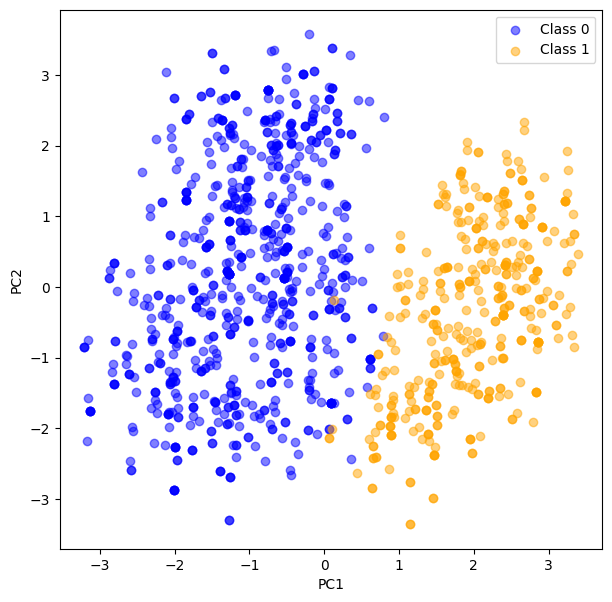

Feature weights in the first principal component: [ 0.30892119 -0.29249548 -0.13562089  0.01092818 -0.00588426 -0.23728626
 -0.40525559 -0.40429542  0.35159104  0.27153022 -0.12015646 -0.03611032
 -0.23182279 -0.01977466 -0.0145021   0.38606446]
The feature with the highest positive weight: b0


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_scaled = StandardScaler().fit_transform(df_bitstrings)
Z_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(7,7))
plt.scatter(Z_pca[(result_2.labels_ == 0), 0], Z_pca[(result_2.labels_ == 0), 1], alpha=0.5, c='blue', label='Class 0')
plt.scatter(Z_pca[(result_2.labels_ == 1), 0], Z_pca[(result_2.labels_ == 1), 1], alpha=0.5, c='orange', label='Class 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Feature weights
print("Feature weights in the first principal component:", pca.components_[0])
max_weight_feature = np.argmax(pca.components_[0])
print(f"The feature with the highest positive weight: {df_bitstrings.columns[max_weight_feature]}")